In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

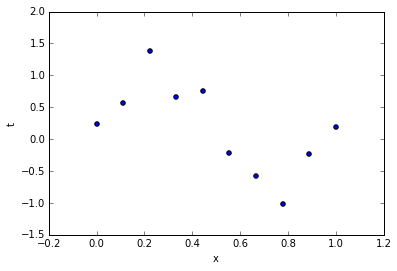

In [2]:
N = 10 # サンプルを取得する位置x１の個数

def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i) / float(num - 1)
        y = np.sin(2 * np.pi * x) + normal(scale = 0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                ignore_index=True)
    return dataset

set = create_dataset(N)
plt.scatter(set.x, set.y)
plt.xlabel("x")
plt.ylabel("t")

上記の通り、10箇所の観測点$x$に対し、それぞれに観測値$t$が与えられているとする。$x$と$t$の間にある関係関数を推測する。以下の様な$x$の多項式を想定する。

$$
\begin{align*}
f(x) &= w_0 + w_1x + w_2x^2 + \cdots + w_Mx^M \\
&= \sum_{m=0}^Mw_mx^m \tag{1}
\end{align*}
$$

(1)式で計算される$t$の値と実際に観測された$t_n$の差の二乗和を誤差とする。

$$
\left\{f(x_1) - t_1\right\}^2 + \left\{f(x_2) - t_2\right\}^2 + \cdots + \left\{f(x_n) - t_n\right\}^2 \\
$$

この値がなるべく小さくなるような$f(x)$が得られるようにパラメーター$\left\{w_m\right\}_{m=0}^M$を決定したい。「誤差$E_D$」を以下のとおり定義する(観測点の数を$N$としている)。

$$
E_D = \frac{1}{2}\sum_{n=1}^N\left\{f(x_n)-t_n\right\}^2 \tag{2}
$$

(2)に(1)を代入すると

$$
E_D= \frac{1}{2}\sum_{n=1}^N\left(\sum_{m=0}^Mw_mx_n^m - t_n \right)^2 \tag{3}
$$




(3)を最小にする$\left\{w_m\right\}_{m=0}^M$を決定したい。これは(3)を$\left\{w_m\right\}_{m=0}^M$の関数とみなした際の偏微分係数が0になるという条件で決定される。

$$
\begin{align*}
\frac{\partial E_D}{\partial w_m} = 0 &\ \ \ (m = 0, \cdots , M) \tag{4}
\end{align*}
$$

(4)に(3)を代入して偏微分を計算すると(代入する際、添字$m$が被らないように(3)の$m$を$m'$に変更している)(<font color="red">※なんで右辺の$x_n^m$にはダッシュつかないの？</font>)

$$
\begin{align*}
\frac{\partial E_D}{\partial w_m} &= \left\{\ \frac{1}{2}\sum_{n=1}^N\left( \sum_{m'=0}^Mw_{m'}x_n^{m'} - t_n \right)^2 \right\}' \\
&= \sum_{n=1}^N\left( \sum_{m'=0}^Mw_{m'}x_n^{m'} - t_n \right) x_n^m \\
&= 0
\end{align*}
$$

上式を変形して

$$
\sum_{m'=0}^Mw_{m'}\sum_{n=1}^N x_n^{m'}x_n^m - \sum_{n=1}^Nt_nx_n^m = 0 \tag{5}
$$

ここで$x_n^m$を$(n,m)$成分とする$N*(M+1)$行列$\Phi$を用いると、以下のとおり行列形式で書き直せる。(<font color="red">※なんで$x_n^{m'}$(ダッシュ付きの方)は$\mathbf{\Phi}^{\mathrm{T}}$になるの？</font>)

$$
\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi} - \mathbf{t}^{\mathrm{T}}\mathbf{\Phi} = \mathbf{0} \tag{6} 
$$

ここで

$$
\begin{align*}
\mathbf{w} &= (w_0, \cdots ,w_m)^{\mathrm{T}} \\
\mathbf{t} &= (t_1, \cdots, t_N)^{\mathrm{T}}\\
\end{align*}
$$

$$
\mathbf{\Phi} = \left(
    \begin{array}{cccc}
      x_1^0 & x_1^1 & \ldots & x_1^M \\
      x_2^0 & x_2^1 & \ldots & x_2^M \\
      \vdots & \vdots & \ddots & \vdots \\
      x_N^0 & x_N^1 & \ldots & x_N^M \\
    \end{array}
  \right)
$$

(6)の両辺の転置をとって

$$
\begin{align*}
\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi} - \mathbf{t}^{\mathrm{T}}\mathbf{\Phi} &= \mathbf{0} \\
\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi} &= \mathbf{t}^{\mathrm{T}}\mathbf{\Phi} \\
\left(\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{\mathrm{T}} &= \left(\mathbf{t}^{\mathrm{T}}\mathbf{\Phi}\right)^{\mathrm{T}} \\
\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{\mathrm{T}}\mathbf{w} &= \mathbf{\Phi}^{\mathrm{T}}\mathbf{t} \\
\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)\mathbf{w} &= \mathbf{\Phi}^{\mathrm{T}}\mathbf{t} \\
\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)\mathbf{w} &= \left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{\mathrm{T}}\mathbf{t} \\
\mathbf{w} &= \left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{\mathrm{T}}\mathbf{t}
\end{align*} \tag{7}
$$

右辺の$\mathbf{\Phi}$と$\mathbf{t}$は観測データから決まるものなので、(7)は観測データを用いて多項式の係数$\mathbf{w}$を決定する公式なっている。
